![](img/list.jpg)

# Sumário

[1. Regressão Linear ](#reg_linear)

[2. Regressão Polinomial](#reg_poli)

[3. Regressão de Poisson](#reg_poisson)

## 1. Regressão Linear  <a name="reg_linear"><a>
    
* [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Segundo o [Teorema de Gauss-Markov](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) um modelo de regressão linear, o estimador de mínimos quadrados ordinários) fornece o melhor estimador imparcial linear dos coeficientes, desde que:

* a esperânça dos erros (resíduos) é 0
* os erros não estão correlacionados
* os erros têm variância igual - homocedasticidade dos erros

Este exemplo usa o único recurso do conjunto de dados de diabetes, para ilustrar um gráfico bidimensional dessa técnica de regressão. A linha reta pode ser vista no gráfico, mostrando como a regressão linear tenta desenhar uma linha reta que minimize melhor a soma residual dos quadrados entre as respostas observadas no conjunto de dados e as respostas previstas pela aproximação linear.

Os coeficientes, a soma dos residuos ao quadrado e o score de variância também são calculados.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coeficiente de angular: 938.24
Erro quadrático médio: 2548.07
R²: 0.47


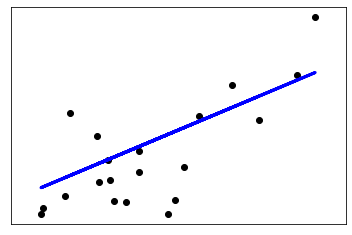

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coeficiente de angular: %.2f' % regr.coef_[0])
# The mean squared error
print("Erro quadrático médio: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('R²: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(()) 
plt.yticks(())

plt.show()

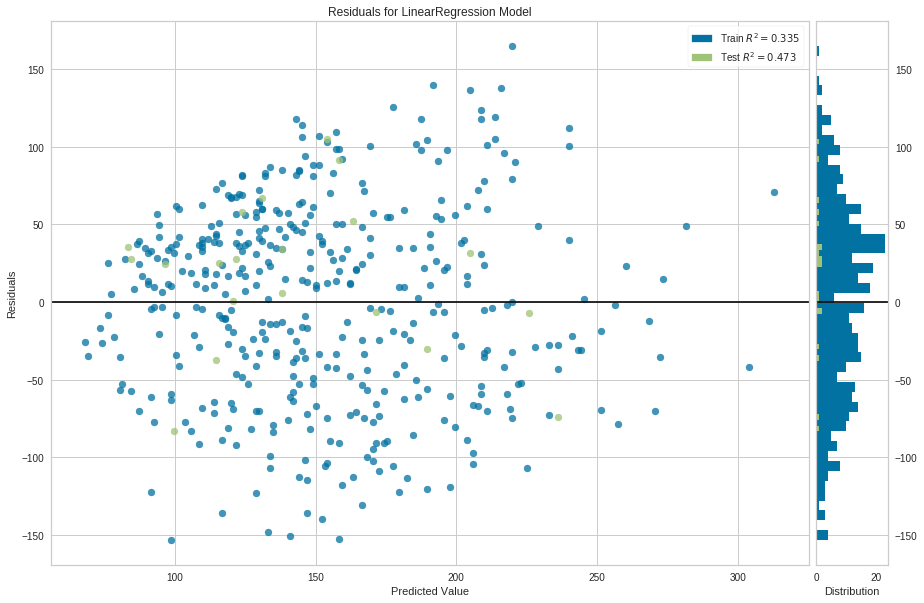

In [51]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regr, size=(1080, 720))

visualizer.fit(diabetes_X_train, diabetes_y_train)  # Fit the training data to the visualizer
visualizer.score(diabetes_X_test, diabetes_y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

### Usando Dataset Boston

In [48]:
import pandas as pd
from sklearn.datasets import load_boston

# load data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.drop('CHAS', axis=1, inplace=True)
y = pd.Series(boston.target, name='MEDV')

# inspect data
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coeficientes: {lin_reg.coef_}\n')
print(f'Intercépto: {lin_reg.intercept_}')
print(f'R² : {lin_reg.score(X, y)}')

Coeficientes: [-1.12227407e-01  4.70252171e-02  4.06441315e-02 -1.73969886e+01
  3.84517903e+00  2.84684840e-03 -1.48555729e+00  3.27895368e-01
 -1.37513229e-02 -9.91733111e-01  9.82674304e-03 -5.34914383e-01]

Intercépto: 36.925032623462045
R² : 0.7354743593558175


Por padrão, uma regressão linear na linguagem R traz muito mais detalhes sobre modelo gerado. Podemos usar R em nosso ambiente para nos benificiarmos dessa característica, para isso, precisamos executar alguns comandos "mágicos".

In [52]:
# fazendo o load da extensão R
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [60]:
# transformando nossos objetos python em obj R
%R -i X -i y

%R lin_reg <- lm(y ~ . , data = cbind(X, y))
%R summary(lin_reg)

R object with classes: ('summary.lm',) mapped to:
<ListVector - Python:0x7fa474ac84c8 / R:0x836aa08>
[Vector, Formula, FloatVector, Matrix, ..., FloatVector, FloatVector, FloatVector, Matrix]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x7fa474562888 / R:0x81fe718>
[RObject, Vector, Vector]
  terms: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x7fa4745d81c8 / R:0x82c93d0>
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fa474758088 / R:0x82fb370>
[-6.217171, -3.671971, 3.847566, 4.633851, ..., -1.979599, -4.028416, -4.406141, -10.663754]
  coefficients: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x7fa4745d4308 / R:0x8232020>
[36.925033, -0.112227, 0.047025, 0.040644, ..., 0.000289, 0.000000, 0.000307, 0.000000]
...
  sigma: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fa4745a8208 / R:0x8362770>
[0.735474]
  df: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fa4745d1188 / R:0x8362738>
[0.729036]
  r.squared: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fa4745a8b08 / R:0x82de2d8>
[114.226123, 12.000000, 493.000000]
  adj.r.squared: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x7fa474613dc8 / R:0x836ced0>
[1.156108, -0.000483, -0.000074, 0.000742, ..., 0.000000, -0.000015, 0.000001, 0.000114]

In [62]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

ImportError: cannot import name 'factorial'

## 2 - Regressão Polinomial <a name="reg_poli"></a>

* [Polynomial Regression](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)

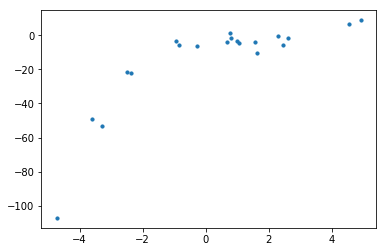

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

Primeiro vamos tentar resolver usando regressão linear e ver o resultado

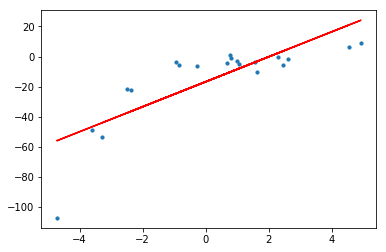

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [10]:
model.score(x, y) # R²

0.6386750054827147

In [14]:
mean_squared_error(y, y_pred)**(0.5) # RMSE

15.908242501429998

Temos então que 63% da variância dos dados foi explicada, com a raíz do erro quadrático médio de aproximadamente 16.

Vamos agora usar um modelo polinomial.

![](img/modelo_poli.png)

Esse modelo ainda é considerado linear, pois os coeficientes/pesos associados as observações ainda são lineares. x² é apenas um recurso. No entanto, a curva que estamos ajustando é de natureza quadrática.

RMSE: 10.12
R²: 0.85


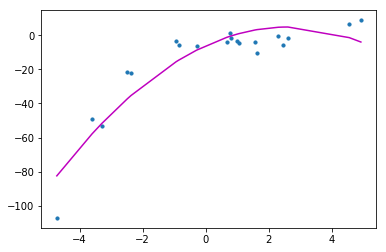

In [20]:
from sklearn.preprocessing import PolynomialFeatures
import operator


polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE: %.2f" %rmse)
print("R²: %.2f" %r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

## 3 - Regressão de Poisson <a name="reg_poisson"></a>

* [An Illustrated Guide to the Poisson Regression Model](https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958)

* [REGRESSION ANALYSIS OF COUNT DATA](http://faculty.econ.ucdavis.edu/faculty/cameron/racd2/)

Usanda para lidar com dados de contagem. Exemplo de dados de contagem:

* Número de veículos atravesando uma avenida.

* Número de pacientes visitando um determinado consultório.

* Número de ciclistas que atravessam uma ponte.


Os dados de contagem têm as seguintes características:

* São números inteiros.

* Distribuição Enviesada.

* Dados esparços

* Taxa de ocorrência.

O modelo de regressão de Poisson e o modelo de regressão binomial negativo são duas técnicas populares para o desenvolvimento de modelos de regressão para contagens. Outras possibilidades são os modelos [Logit Ordenado](https://en.wikipedia.org/wiki/Ordered_logit), [Probit Ordenado](https://en.wikipedia.org/wiki/Ordered_probit) e [Mínimos Quadrados não Lineares](https://en.wikipedia.org/wiki/Non-linear_least_squares).

#### O modelo

O trabalho do modelo de regressão de Poisson é ajustar as contagens observadas y à matriz de regressão X por meio de uma função de link que expressa o vetor de taxa λ em função de: 1) os coeficientes de regressão β e 2) a matriz de regressão X.

![](img/modelo_poisson.png)

Qual poderia ser uma boa função de link f (.), conectando λ com X? A seguinte função de link exponencial funciona muito bem:

![](img/funcao_link.png)

Esta função de link mantém λ não negativo, mesmo quando os regressores X ou os coeficientes de regressão β têm valores negativos. Este é um dos requisito para dados baseados em contagem, serem positivos.

#### Treinando o modelo de Regressão de Poisson

Treinar um modelo de regressão de Poisson envolve encontrar os valores dos coeficientes de regressão β que tornariam o vetor das contagens observadas y mais provável.

A técnica para identificar os coeficientes β é denominada **Estimativa de Máxima Verossimilhança(MLE)**.

A probabilidade de ocorrência de todo o conjunto de n contagens $y_1, y_2, ..., y_n$ no conjunto de treinamento é a probabilidade conjunta de ocorrência das contagens individuais.

As contagens y seguem uma distribuição de Poisson, portanto $y_1, y_2, ..., y_n$ são variáveis aleatórias independentes, condicionadas correspondentemente a $x_1, x_2,…, x_n$. Portanto, a probabilidade conjunta de ocorrência de $y_1, y_2,…, y_n$ pode ser expressa como uma simples multiplicação das probabilidades individuais. Aqui está a aparência da probabilidade conjunta para todo o conjunto de treinamento:

![](img/proba_conj.png)

Qual valor de β tornará o conjunto de contagens observadas y mais provável? É o valor de β para o qual a probabilidade conjunta mostrada na equação acima atinge o valor máximo. Em outras palavras, é o valor de β para o qual a taxa de variação da probabilidade conjunta é 0. Em outras palavras, é a solução da equação obtida da diferenciação da equação de probabilidade conjunta e ajustando esta equação diferencial para 0.

É mais fácil diferenciar o logaritmo da equação de probabilidade conjunta do que a equação original. A solução para a equação registrada produz o mesmo valor ótimo de β.

Essa equação logarítmica é chamada de função de probabilidade de log. Para a regressão de Poisson, a **função log-verossimilhança** é dada pela seguinte equação:

![](img/funcao_log.png)

Diferenciando em relação a β, temos:

![](img/forma_dife.png)

Resolver esta equação para os coeficientes de regressão β produzirá a **Estimativa de Máxima Verossimilhança(MLE)** para β.

Para resolver a equação acima, utiliza-se um método iterativo como **IRLS (Iteratively Reweighted Least Squares)**. Na prática, não se resolve esta equação manualmente. Em vez disso, você usa um software estatístico, como o pacote *statsmodels* do Python, que fará todos os cálculos para você enquanto treina o modelo de regressão de Poisson no seu conjunto de dados.

In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/nyc_bb_bicyclist_counts.csv', header=0, 
                 infer_datetime_format=True, parse_dates=[0], 
                 index_col=[0])
df.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,
2017-04-01,46.0,37.0,0.00,606
2017-04-02,62.1,41.0,0.00,2021
2017-04-03,63.0,50.0,0.03,2470
2017-04-04,51.1,46.0,1.18,723
2017-04-05,63.0,46.0,0.00,2807


In [3]:
# separando os intens das datas
ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

df.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,MONTH,DAY_OF_WEEK,DAY
Date,,,,,,,
2017-04-01,46.0,37.0,0.00,606,4,5,1
2017-04-02,62.1,41.0,0.00,2021,4,6,2
2017-04-03,63.0,50.0,0.03,2470,4,0,3
2017-04-04,51.1,46.0,1.18,723,4,1,4
2017-04-05,63.0,46.0,0.00,2807,4,2,5


In [5]:
# separando os dados de treino e teste
# vamos separar 80% para treino

mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=164
Testing data set length=50


Configure a expressão de regressão na notação de patsy. Estamos dizendo ao patsy que BB_COUNT é a nossa variável dependente e que depende das variáveis de regressão: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T e PRECIP:

In [6]:
expr = """BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"""

Configure as matrizes X e y para os conjuntos de dados de treinamento e teste. patsy torna isso realmente simples

In [7]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

Usando a classe GLM do statsmodels, treine o modelo de regressão de Poisson no conjunto de dados de treinamento.

In [8]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [9]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  164
Model:                            GLM   Df Residuals:                      157
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11009.
Date:                Sun, 17 Nov 2019   Deviance:                       20440.
Time:                        16:06:25   Pearson chi2:                 2.01e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8099      0.013    512.244      

Vamos aplicar o teste no nosso modelo:

In [10]:
poisson_predictions = poisson_training_results.get_prediction(X_test)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2017-04-06  1090.728188   7.039502    1077.017915    1104.612991
2017-04-11  3150.281260  11.617286    3127.593886    3173.133208
2017-04-22  1647.775834   8.339430    1631.511649    1664.202152
2017-05-02  2327.194274  11.534627    2304.696275    2349.911893
2017-05-03  2105.107316   9.625489    2086.325987    2124.057717
2017-05-04  2312.039162   8.585821    2295.272354    2328.928450
2017-05-06  1791.130328   7.560081    1776.373963    1806.009274
2017-05-07  1681.250758   9.523068    1662.689113    1700.019619
2017-05-11  2151.863163   7.550624    2137.114984    2166.713118
2017-05-15  2576.632005   8.888888    2559.268871    2594.112937
2017-05-18  3452.190936  12.567449    3427.646855    3476.910768
2017-05-27  2445.334621   8.548812    2428.636529    2462.147520
2017-06-03  2653.649350   9.443450    2635.204925    2672.222871
2017-06-05  2292.046004  

Vamos comparar com os valores reais:

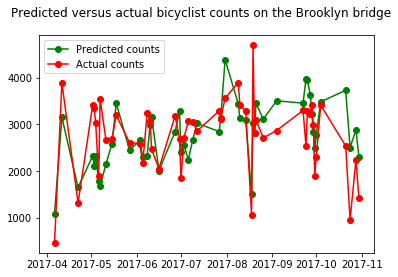

In [12]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['BB_COUNT']

fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge');
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts');
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts');
plt.legend(handles=[predicted, actual]);
plt.show();

#### Qualidade do ajuste do modelo de Regressão de Poisson

Lembre-se de que o valor esperado (isto é, a média) e a variação da distribuição de Poisson é λ. Essa condição bastante rígida é violada pela maioria dos dados do mundo real.

Uma fonte comum de falha do modelo de regressão de Poisson é que os dados não atendem ao critério de média = variância imposto pela distribuição de Poisson.

Os valores reportados de Deviance e Pearson qui-quadrado são muito grandes. Um bom ajuste é praticamente impossível, considerando esses valores. Para fazer uma determinação quantitativa da qualidade do ajuste em algum nível de confiança, digamos 95% (p = 0,05), procuramos o valor na tabela χ2 para p = 0,05 e Graus de liberdade de resíduos = 157, do Df Residuals. Comparamos esse valor do qui-quadrado com a estatística observada, neste caso, o valor do desvio-padrão ou do [Qui-quadrado de Pearson](https://www.youtube.com/watch?v=2QeDRsxSF9M) relatado no GLMResults. Descobrimos que para p = 0,05 e DF Residuals = 157, o valor do qui-quadrado, de acordo com a [tabela padrão do Qui-quadrado](https://www.medcalc.org/manual/chi-square-table.php), é de 187,239, muito menor que a estatística relatada de 20.440 e 20.100. Portanto, conforme este teste, o modelo de regressão de Poisson , apesar de demonstrar um ajuste visualmente "aceitável" para o conjunto de dados de teste, os dados de treinamento foram bastante inadequados.